# Explore here

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os

In [21]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)

# Nos quedamos solo con las variables solicitadas
df = df[['Latitude', 'Longitude', 'MedInc']]
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [15]:
#Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

PASO 2

Cluster
5    6511
4    4839
0    4252
1    2801
2    1658
3     579
Name: count, dtype: int64


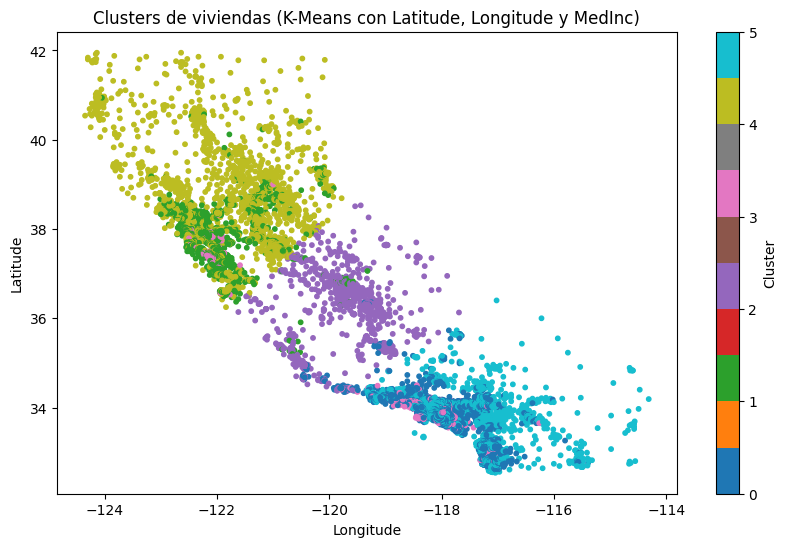

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar KMeans con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Ver formato y valores de la columna cluster
print(df['Cluster'].value_counts())

# Graficar en un diagrama de puntos (Latitude vs Longitude)
plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='tab10', s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters de viviendas (K-Means con Latitude, Longitude y MedInc)")
plt.colorbar(label="Cluster")
plt.show()

PASO 3:

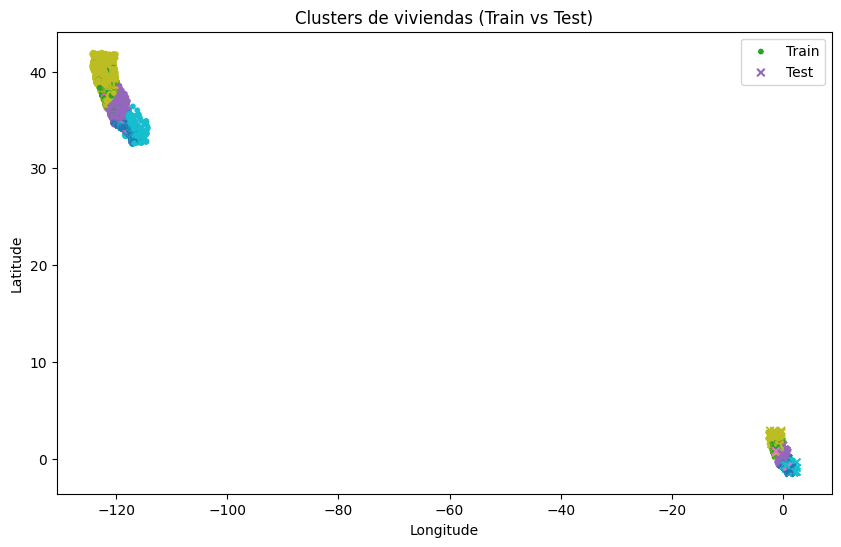

In [18]:
# Dividir en train/test en datos escalados
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Predecir con el conjunto de test usando el modelo entrenado
test_clusters = kmeans.predict(X_test)

# Graficar: primero todo el dataset (train implícito)
plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='tab10', s=10, label="Train")

# Ahora graficar puntos test encima (con forma distinta)
plt.scatter(X_test[:,1], X_test[:,0],  # Ojo: X_scaled = [Latitude, Longitude, MedInc] => col 0=Lat, col 1=Lon
            c=test_clusters, cmap='tab10', marker='x', s=30, label="Test")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters de viviendas (Train vs Test)")
plt.legend()
plt.show()

PASO 4:

📊 Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       837
           1       0.99      1.00      1.00       524
           2       0.99      0.99      0.99       337
           3       1.00      0.99      1.00       114
           4       1.00      0.99      1.00       950
           5       1.00      1.00      1.00      1366

    accuracy                           1.00      4128
   macro avg       1.00      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



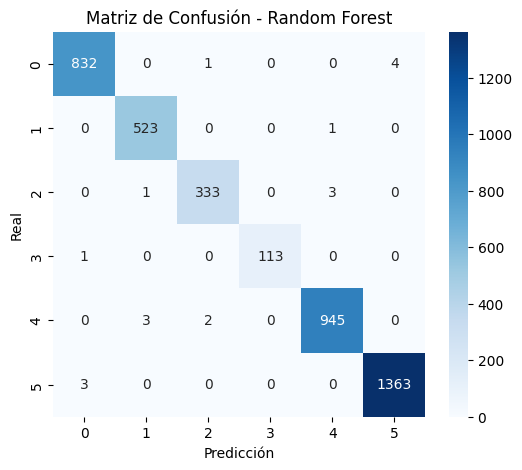

In [19]:
# Usar los clusters como etiquetas (y)
X = df[['Latitude', 'Longitude', 'MedInc']]
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluación
y_pred = rf_model.predict(X_test)

print("📊 Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

In [20]:
import joblib
import os

# Crear carpeta si no existe
os.makedirs("modelos", exist_ok=True)

# Guardar KMeans
joblib.dump(kmeans, "modelos/kmeans_model.pkl")

# Guardar Random Forest
joblib.dump(rf_model, "modelos/random_forest_model.pkl")

print("✅ Modelos guardados en la carpeta'modelos'")

✅ Modelos guardados en la carpeta'modelos'
